We have a dataset of Mall_Customers, which is the data of customers who visit the mall and spend there.
In the given dataset, we have Customer_Id, Gender, Age, Annual Income ($), and Spending Score (which is the calculated value of how much a customer has spent in the mall, the more the value, the more he has spent).
From this dataset, we need to calculate some patterns to understand what kind of ppl visit the mall

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
dataset = pd.read_csv('Mall_customers.csv')
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
dataset.shape

(200, 5)

In [16]:
data =dataset.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values

In [18]:
data[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [19]:
data.shape

(200, 2)

In [24]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    

In [25]:
wcss

[269981.28,
 182440.30762987013,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30227.606513152015,
 25056.895153616188,
 21826.93630323165]

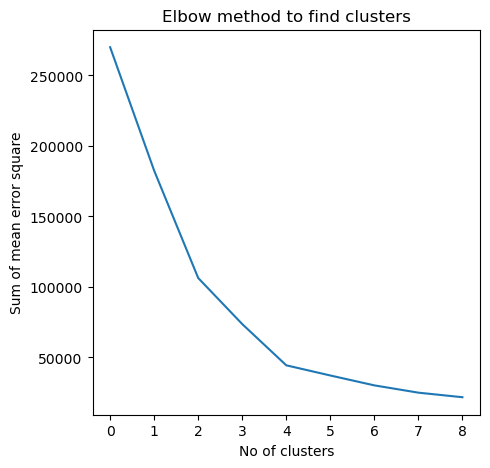

In [34]:
import seaborn as sns

plt.figure(figsize=(5,5))
plt.plot(range(0,9,),wcss)
plt.title("Elbow method to find clusters")
plt.xlabel("No of clusters")
plt.ylabel("Sum of mean error square")
plt.show()

In [35]:
# Optical number of clusters is 5 as the fall after 5 is steep

In [53]:
kmeans = KMeans(n_clusters=7,init='k-means++')
kmeans.fit(data)
kmeans.fit_predict(data)
print("cluster centers",kmeans.cluster_centers_)
print("MSE mean square error",kmeans.inertia_)
print("kmeans",kmeans)
print("labels",kmeans.labels_)

cluster centers [[ 25.72727273  79.36363636]
 [ 54.61538462  50.02564103]
 [ 78.89285714  17.42857143]
 [108.18181818  82.72727273]
 [ 26.30434783  20.91304348]
 [109.7         22.        ]
 [ 78.03571429  81.89285714]]
MSE mean square error 30259.65720728547
kmeans KMeans(n_clusters=7)
labels [4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6
 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 3 5 3 5 3 5
 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3]


In [54]:
print("size",kmeans.labels_.shape)

size (200,)


In [55]:
cdata = dataset.copy()
cdata.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [56]:
cdata.drop('CustomerID',axis=1,inplace=True)
cdata.drop('Gender',axis=1,inplace=True)
cdata.drop('Age',axis=1,inplace=True)
cdata['clusters']=kmeans.labels_


In [57]:
cdata

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,5
197,126,74,3
198,137,18,5


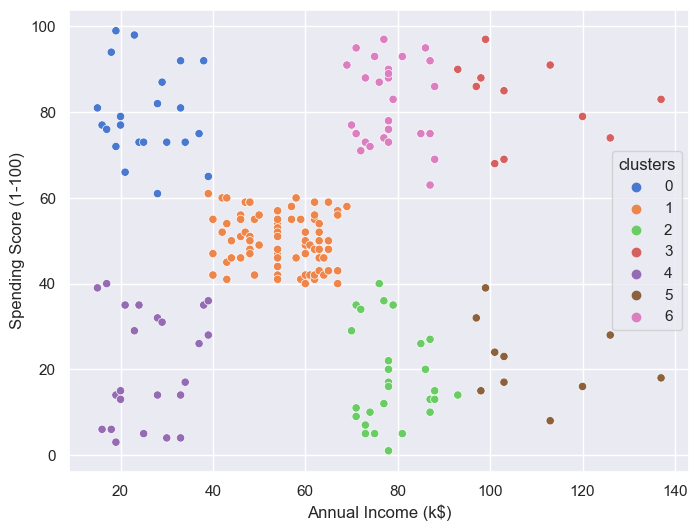

In [58]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set(rc={"figure.figsize":(8, 6)})
sns.color_palette('pastel')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=cdata, hue='clusters', palette='muted')
plt.legend
plt.show()

cluster centers [[87.         18.63157895]
 [44.15447154 49.82926829]
 [86.53846154 82.12820513]]
MSE mean square error 106348.3730621112
kmeans KMeans(n_clusters=3)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


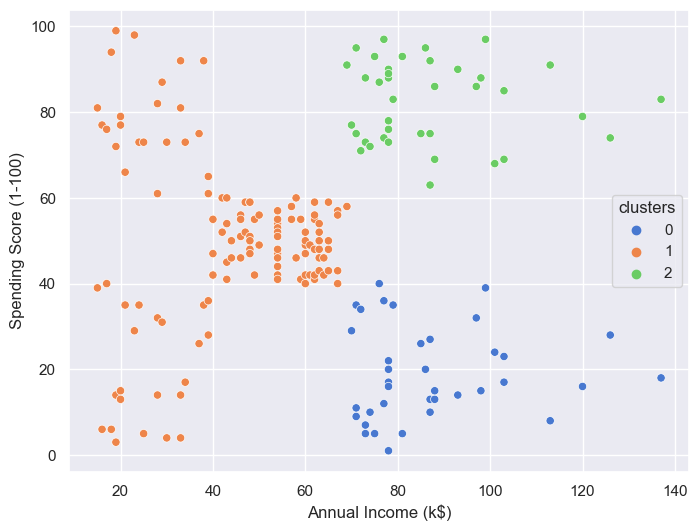

In [60]:
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit(data)
kmeans.fit_predict(data)
print("cluster centers",kmeans.cluster_centers_)
print("MSE mean square error",kmeans.inertia_)
print("kmeans",kmeans)
print("labels",kmeans.labels_)

cdata['clusters']=kmeans.labels_

sns.set_style('whitegrid')
sns.set(rc={"figure.figsize":(8, 6)})
sns.color_palette('pastel')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=cdata, hue='clusters', palette='muted')
plt.legend
plt.show()